In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from rdkit import Chem
import pandas as pd
from predict_tautomer import get_taut_data
import mols2grid

In [3]:
def construct_data(out_data):
    new_data = []
    for info in out_data:
        # if info["label"] == "high_energy":
        #     continue
        new_data.append([Chem.MolFromSmiles(info["tsmi"]), info["tsmi"], info["score"], info["label"]])
    df_data = pd.DataFrame(new_data)
    df_data.columns = ["tmol", "tsmi", "score", "label"]
    return df_data

In [4]:
# smi = "Cc1c2c([nH]n1)OC(=C([C@@]2(c3cc(cc(c3)N4CCCC4)C(F)(F)F)C(C)C)C#N)N"
# smi = 'Cn1c(=O)c2[nH]cnc2n(C)c1=O'
# smi = 'C[C@@H](c1ccc2ncccc2c1)c1nnc2ccc(-c3cnn(C)c3)nn12'
smi = 'O=C(CCc1c[nH]c2ccccc12)NS(=O)(=O)OC[C@H]1O[C@@H](n2cnc3c2ncn2ccnc32)[C@H](O)[C@@H]1O'
# smi = 'Cc1ccc(C(=O)Nc2ccc(CN3CC[NH+](C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12'
# smi = 'Cn1cnc2c(O)nc(N)nc21'
# smi = 'N=C1/NC2(c3c(F)cccc3F)CN(c3nc(C)c(F)c(OC)n3)CC2C(=O)N1C'
# smi = 'CCCC(C(=O)Nc1ccc(S(N)(=O)=O)cc1)C(C)(C)C'
# smi = 'O=c1c2ccccc2oc2ccc(S(=O)(=O)N=c3[nH]nn[nH]3)cc12'
# smi = 'Nc1ncnc2c1ncn2C1OC(COP(=O)(O)CP(=O)(O)OP(=O)(O)O)C(O)C1O'
# smi = 'Cc1cc2nc3c(=O)[nH]c(=O)nc-3n(CC(O)C(O)C(O)COP(=O)(O)O)c2cc1C'
# smi = 'Nc1nc(-c2cc(Br)cc3ccoc23)c2nc[nH]c2n1'
# smi = 'O=c1ccn(Cc2cn(C3OC(CO)C(O)C3O)nn2)c(=O)[nH]1'
# smi = 'Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)O)C(O)C2O)c(=O)[nH]1'
# smi = 'Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OC2C1O'
# smi = 'O=C(C=Cc1cccc(S(=O)(=O)Nc2ccccc2)c1)NO'
# smi = 'O=c1cc(C(F)(F)F)c2cc(N(CC(F)(F)F)CC(F)(F)F)ccc2[nH]1'

# smi = 'O=C1NS(=O)(=O)Nc2c1ncn2C1OC(CO)C(O)C1O'
# smi = 'O=C(O)c1cccc(N2C(=O)C(O)=C(C(=O)c3cccc(C(F)(F)F)c3)C2c2cc(Cl)c3c(c2)OCO3)c1'
# smi = 'CN2C(=O)C(O)=C(C(=O)c3cccc(C(F)(F)F)c3)C2c2cc(Cl)c3c(c2)OCO3'
# smi = 'C=NCc1ccc(C(F)(F)F)cc1'
# smi = 'c1cc(ccc1CN=Cc2ccc(cc2)C(F)(F)F)C(F)(F)F'
# smi = 'Nc1c(O)n(Cc2ccccc2)c(=O)[nH]c1=O' #3ZLL
# smi = 'CN(C)Cc1cc(Cl)cc(Cl)c1O'
# smi = 'CN1CCC(CC1)N(C)Cc2cc(cc(c2O)Cl)Cl'
# smi = 'CC1=NC2C(OC(CO)C(O)C2O)S1' #3sus
# smi = "C=NCc1ccc(C(F)(F)F)cc1" #4nl1 st is not correct
# smi = "CN(C)Cc1cc(I)cc(I)c1O"
# smi = "O=C1Cn2c(Cl)cnc(c2=O)NC(Cc2ccccc2)CNCCCNCCc2ccccc2CN1" # cyclic molecules 1g2o
# smi = "Oc1cccccc1=S" # not correct
# smi = "OCC1OC(OC2C(O)C(O)c3nccn3C2CO)C(O)C(O)C1O"
# smi = "OCC1OC(N2CNc3c(O)ncnc32)C(O)C1O" # 2ada
# smi = "Nc1nc(=O)c2cc(CCCc3ccc(C(=O)NC(CCC(=O)O)C(=O)O)s3)[nH]c2[nH]1" # 4zyw
# smi = "CC1(C)OC2CC3C4CCC5=CC(=O)C=CC5(C)C4(F)C(O)CC3(C)C2(C(=O)CO)O1" # 5ufs
# smi = "CC(=O)NC1C(OC2C(CO)OC(OC3C(CO)OC4SC(C)=NC4C3O)C(NC(C)=O)C2O)OC(CO)C(O)C1O" # 2wm0
# smi = "CCCc1nc(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)[nH]n12"   #1uho
smi = "Cc1c2c([nH]n1)OC(=C([C@@]2(c3cc(cc(c3)N4CCCC4)C(F)(F)F)C(C)C)C#N)N"
# smi = "O=[N+]([O-])c1c(Nc2cc(F)cc(Cl)c2)ccc2nonc12"
smi = "N#Cc1cnn2c(O)c(Cc3ccccc3)c(Cl)nc12" #5mrp good example
smi = "O=C(O)c1cc(O)c2c(Cl)cc(Cl)cc2n1" # 1pbq good example
smi = "COc1ccc(NC(=O)C(C)Nc2nc(=O)c3cnn(C4CCCC4)c3[nH]2)cc1" #4qge good example
smi = "CCCC(=O)OC[C@@H](OC(=O)CCC)[C@@H](OC(=O)CCC)[C@H](CN1C2=C(C=C(C)C(C)=C2)N=C2C(=O)NC(=O)N=C12)OC(=O)CCC"

smi = "CC(=O)OC1=CC=C(C=C1)C1(OC2=CC=CC=C2N=C1O)C1=CC=C(OC(C)=O)C=C1" #Bisoxatin acetate
smi = "CC(=O)OC1=CC=C(C=C1)C1(OC2=C(NC1=O)C=CC=C2)C1=CC=C(OC(C)=O)C=C1" #Bisoxatin acetate
smi = "COC1=C(CNC(=O)C2=C(C)N([C@H](C)C3CCN(CC(F)(F)F)CC3)C3=CC=CC=C23)C(=O)NC(C)=C1"
smi = "COc1ccc(N=C(S)NCCCn2ccnc2)cc1OC" #4mhz in pdbbind
smi = "CC(C)(C)NC(=O)C1(c2c(C(=O)O)[nH]c3cc(Cl)ccc23)N2C(=O)C21c1ccc(OCc2ccc(Cl)cc2)cc1"
smi = "[H]N=C(N)NCCCC(NS(=O)(=O)c1cccc(C(F)(F)F)c1)C(=O)N1CCN(CCCN)CC1"
smi = "[H]N=C(N)Nc1ccc(CNC(=O)NC23CC4CC(CC(C4)C2)C3)cc1"


energy_cutoff = 2.76
cutmol = True
num_confs = 100
ionization=False
ph = 7.0
tph = 1.0

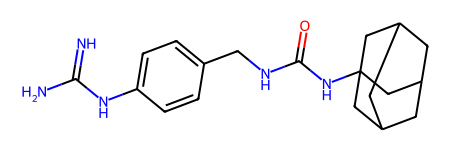

In [5]:
mol = Chem.MolFromSmiles( smi )
mol

In [6]:
# pattern = Chem.MolFromSmarts("[#7]~[#6](~[#7])~[#7]")
# atom_idx = sum(mol.GetSubstructMatches(pattern), ())

In [7]:
# atom_idx

In [8]:
data = get_taut_data(smi, cutmol, num_confs, energy_cutoff, ionization, ph, tph)

In [9]:
df = construct_data(data)

In [10]:
df.head()

,tmol,tsmi,score,label
0,<rdkit.Chem.rdchem.Mol object at 0x301898200>,N=C(N)Nc1ccc(CNC(=O)NC23CC4CC(CC(C4)C2)C3)cc1,0.0,low_energy
1,<rdkit.Chem.rdchem.Mol object at 0x301899230>,N=C(N)Nc1ccc(CN=C(O)NC23CC4CC(CC(C4)C2)C3)cc1,17.73,high_energy
2,<rdkit.Chem.rdchem.Mol object at 0x301898f20>,N=C(N)Nc1ccc(CNC(O)=NC23CC4CC(CC(C4)C2)C3)cc1,21.04,high_energy


In [11]:
mols2grid.display(df, mol_col="tmol", subset=["img", "score", "label"], n_cols=3, size=(200, 200))

MolGridWidget()

In [ ]:
# Protect NO2 and NO

# PDBBind Database

In [11]:
import glob
from rdkit.Chem import AllChem
from rdkit.Chem.MolStandardize import rdMolStandardize

def uncharge_molecule(mol):
    un = rdMolStandardize.Uncharger()
    mol = un.uncharge(mol)
    mol = Chem.MolFromSmiles(Chem.MolToSmiles(mol))
    return mol

In [12]:
ligand_files = glob.glob("../scoringfunction/DataSet/Structure/*/Lig_fixed.sdf")

In [13]:
ligand_files[:10]

['../scoringfunction/DataSet/Structure/4eoh/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/3zc5/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/1utl/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/5i2e/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/1p1n/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/2yay/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/2y7i/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/3l7d/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/4v04/Lig_fixed.sdf',
 '../scoringfunction/DataSet/Structure/1ft7/Lig_fixed.sdf']

In [14]:
len( ligand_files )

6161

In [15]:
file = ligand_files[3050]
print(file)

../scoringfunction/DataSet/Structure/2hvc/Lig_fixed.sdf


In [16]:
mol = next(Chem.SDMolSupplier( file ))

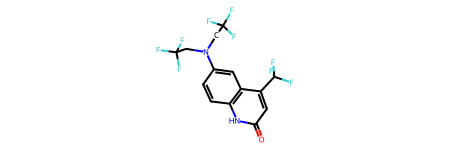

In [17]:
mol

In [18]:
smi = Chem.MolToSmiles(mol)

In [19]:
smi

'O=c1cc(C(F)(F)F)c2cc(N(CC(F)(F)F)CC(F)(F)F)ccc2[nH]1'

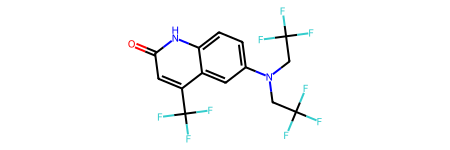

In [20]:
mol = uncharge_molecule(mol)
mol

In [21]:
Chem.MolToSmiles( mol, isomericSmiles=False)

'O=c1cc(C(F)(F)F)c2cc(N(CC(F)(F)F)CC(F)(F)F)ccc2[nH]1'

In [ ]:
energy_cutoff = 2.76
cutmol = True
num_confs = 100
ph = 7.0
tph = 1.0


num = 0
for file in ligand_files:
    mol = next(Chem.SDMolSupplier( file ))
    if not mol:
        print("read mol error:", file)
    try:
        mol = uncharge_molecule(mol)
    except:
        print("uncharge error mol:", file)
        continue
    smi = Chem.MolToSmiles( mol, isomericSmiles=False)
    try:
        data = get_taut_data(smi, cutmol, num_confs, energy_cutoff, ph, tph)
        df = construct_data(data)
    except:
        print("error mol:", file)
        continue
    if smi not in df['tsmi'].tolist():
        print(file, smi)
        num += 1

../scoringfunction/DataSet/Structure/5u0w/Lig_fixed.sdf Cn1cnc2c(O)nc(N)nc21
../scoringfunction/DataSet/Structure/5he4/Lig_fixed.sdf [H]N=C1NC2(c3c(F)cccc3F)CN(c3nc(C)c(F)c(OC)n3)CC2C(=O)N1C
error mol: ../scoringfunction/DataSet/Structure/3oy0/Lig_fixed.sdf
../scoringfunction/DataSet/Structure/4dkq/Lig_fixed.sdf NC(N)=NC1Cc2ccccc2C1NC(=O)C(=O)Nc1ccc(Cl)c(F)c1
error mol: ../scoringfunction/DataSet/Structure/2qoa/Lig_fixed.sdf
../scoringfunction/DataSet/Structure/3aau/Lig_fixed.sdf N=C(N)Nc1ccc(O)c(C=NCCN=Cc2cc(N=C(N)N)ccc2O)c1
../scoringfunction/DataSet/Structure/3hiv/Lig_fixed.sdf COC1C(OP(=O)(O)OCC2CN(Cc3c[nH]c4c(N)ncnc34)CC2OP(=O)(O)OCC2OC(n3cnc4c(=O)nc(N)[nH]c43)C(OC)C2OP(=O)(O)OCCCO)C(CO)OC1N1CN=C2C(=O)N=C(N)N=C21
../scoringfunction/DataSet/Structure/2z3h/Lig_fixed.sdf [H]N=C(N)N(C)CCC(N)CC(=O)NC1C=CC(n2ccc(O)nc2=O)OC1C(=O)O
error mol: ../scoringfunction/DataSet/Structure/4wr7/Lig_fixed.sdf
../scoringfunction/DataSet/Structure/1x38/Lig_fixed.sdf OCC1C(O)C(O)C(O)c2nc(-c3ccccc3)cn21


In [1]:
# ../scoringfunction/DataSet/Structure/5u0w/Lig_fixed.sdf Cn1cnc2c(O)nc(N)nc21 #
# ../scoringfunction/DataSet/Structure/5he4/Lig_fixed.sdf [H]N=C1NC2(c3c(F)cccc3F)CN(c3nc(C)c(F)c(OC)n3)CC2C(=O)N1C #
# error mol: ../scoringfunction/DataSet/Structure/3oy0/Lig_fixed.sdf
# ../scoringfunction/DataSet/Structure/3oy0/Lig_fixed.sdf CCCC(C(=O)Nc1ccc([SH](=N)(O)O)cc1)C(C)(C)C ### input error
# ../scoringfunction/DataSet/Structure/4dkq/Lig_fixed.sdf NC(N)=NC1Cc2ccccc2C1NC(=O)C(=O)Nc1ccc(Cl)c(F)c1  #
# error mol: ../scoringfunction/DataSet/Structure/2qoa/Lig_fixed.sdf
# ../scoringfunction/DataSet/Structure/2qoa/Lig_fixed.sdf N=[SH](O)(O)c1ccc2c(c1)CCC2 ### input error
# ../scoringfunction/DataSet/Structure/3aau/Lig_fixed.sdf N=C(N)Nc1ccc(O)c(C=NCCN=Cc2cc(N=C(N)N)ccc2O)c1 #
# ../scoringfunction/DataSet/Structure/3hiv/Lig_fixed.sdf COC1C(OP(=O)(O)OCC2CN(Cc3c[nH]c4c(N)ncnc34)CC2OP(=O)(O)OCC2OC(n3cnc4c(=O)nc(N)[nH]c43)C(OC)C2OP(=O)(O)OCCCO)C(CO)OC1N1CN=C2C(=O)N=C(N)N=C21
# ../scoringfunction/DataSet/Structure/2z3h/Lig_fixed.sdf [H]N=C(N)N(C)CCC(N)CC(=O)NC1C=CC(n2ccc(O)nc2=O)OC1C(=O)O
# error mol: ../scoringfunction/DataSet/Structure/4wr7/Lig_fixed.sdf
# ../scoringfunction/DataSet/Structure/4wr7/Lig_fixed.sdf CCCSc1c(F)c(F)c([SH](=N)(O)O)c(F)c1F #
# ../scoringfunction/DataSet/Structure/1x38/Lig_fixed.sdf OCC1C(O)C(O)C(O)c2nc(-c3ccccc3)cn21
# ../scoringfunction/DataSet/Structure/3suf/Lig_fixed.sdf C=CC1CC1(NC(=O)C1CC2CN1C(=O)C(C(C)(C)C)NC(=O)OC1CC1CCCCCc1nc3ccc(OC)cc3nc1O2)C(=O)NS(=O)(=O)C1CC1

In [4]:
smi2 = "CC1NC2C(=O)C(O)C(CO)OC2S1"
smi1 = "CC1NC2C(OC(CO)C(=O)C2O)S1"
smi0 = "CC1=NC2C(OC(CO)C(O)C2O)S1"

In [6]:
smis = [smi2, smi1, smi0]
mols = [Chem.MolFromSmiles( smi ) for smi in smis]

In [7]:
mols2grid.display(mols, size=(200, 200))

MolGridWidget()

In [9]:
(-1066.80500056 - (-1066.81313739)) * 627.51

5.105942193307653

In [10]:
# 5 kcal/mol